In [1]:
!ls

AI_Grid_Hackathon.ipynb        LoadProfile_30IPs_2017.csv
AI_Grid_Hackathon_JB_DEV.ipynb requirements.txt
AI_Grid_Hackathon_JP_DEV.ipynb test
AI_Grid_Hackathon_vk.ipynb     tune
LoadProfile_20IPs_2016.csv


In [2]:
import pandas as pd
def load_dataframe(pfad):
    df = pd.read_csv(pfad)
    
    df.reset_index(inplace=True)  
   
    # Erstanalyse
    print('Merkmale:', list(df.columns))
    print('\nGröße des Dataframes:', df.shape)
    print('\nDatentypen der Merkmale:\n', df.dtypes)
    print('\nLeere Daten:\n', df.isna().sum())
    
    return df

x_training = load_dataframe('tune/2016_train.csv')
x_test = load_dataframe('tune/2016_val.csv')

Merkmale: ['index', 'Time stamp', 'LG 1', 'LG 2', 'LG 3', 'LG 4', 'LG 5', 'LG 6', 'LG 7', 'LG 8', 'LG 9', 'LG 10', 'LG 11', 'LG 12', 'LG 13']

Größe des Dataframes: (23424, 15)

Datentypen der Merkmale:
 index           int64
Time stamp     object
LG 1            int64
LG 2          float64
LG 3          float64
LG 4          float64
LG 5          float64
LG 6          float64
LG 7          float64
LG 8            int64
LG 9            int64
LG 10         float64
LG 11         float64
LG 12         float64
LG 13         float64
dtype: object

Leere Daten:
 index         0
Time stamp    0
LG 1          0
LG 2          0
LG 3          0
LG 4          0
LG 5          0
LG 6          0
LG 7          0
LG 8          0
LG 9          0
LG 10         0
LG 11         0
LG 12         0
LG 13         0
dtype: int64
Merkmale: ['index', 'Time stamp', 'LG 1', 'LG 2', 'LG 3', 'LG 4', 'LG 5', 'LG 6', 'LG 7', 'LG 8', 'LG 9', 'LG 10', 'LG 11', 'LG 12', 'LG 13']

Größe des Dataframes: (11716, 15)

Datent

In [3]:
train_data = x_training[['Time stamp', 'LG 1']]
test_data = x_test[['Time stamp', 'LG 1']]
print(train_data.head())
print(train_data.tail())
print(test_data.head())
print(test_data.tail())


            Time stamp  LG 1
0  2016-01-01 00:15:00    39
1  2016-01-01 00:30:00    41
2  2016-01-01 00:45:00    39
3  2016-01-01 01:00:00    40
4  2016-01-01 01:15:00    39
                Time stamp  LG 1
23419  2016-08-31 23:00:00    18
23420  2016-08-31 23:15:00    19
23421  2016-08-31 23:30:00    18
23422  2016-08-31 23:45:00    18
23423  2017-01-01 00:00:00    37
            Time stamp  LG 1
0  2016-09-01 00:00:00    18
1  2016-09-01 00:15:00    18
2  2016-09-01 00:30:00    18
3  2016-09-01 00:45:00    18
4  2016-09-01 01:00:00    19
                Time stamp  LG 1
11711  2016-12-31 22:45:00    37
11712  2016-12-31 23:00:00    38
11713  2016-12-31 23:15:00    38
11714  2016-12-31 23:30:00    38
11715  2016-12-31 23:45:00    38


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(0, 1))

In [5]:
scaled_train = scaler_X.fit_transform(train_data[['LG 1']])
scaled_test = scaler_X.fit_transform(test_data[['LG 1']])

In [6]:
n_future = 48  # 48 Zeitschritte in die Zukunft

x_train = scaled_train[:-n_future]  
y_train = scaled_train[n_future:]

x_test = scaled_test[:-n_future]
y_test = scaled_test[n_future:]

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (23376, 1)
y_train shape: (23376, 1)


In [7]:
import numpy as np
def create_dataset(dataset_x, dataset_y, lookback):
    X, y = [], []
    for i in range(len(dataset_x) - lookback):
        feature = dataset_x[i:(i + lookback)]
        X.append(feature)
        y.append(dataset_y[i + lookback])
    
    X_array = np.array(X)
    y_array = np.array(y)
    
    return X_array, y_array    

# Lookback setzen (z. B. 672 Zeitschritte für die Eingabe-Sequenz)
lookback = 672
X_train, Y_train = create_dataset(x_train, y_train, lookback=lookback)
X_test, Y_test = create_dataset(x_test, y_test, lookback=lookback)

# Überprüfe die Dimensionen der Trainings- und Test-Daten
print(f"Train: X shape: {X_train.shape}, Y shape: {Y_train.shape}")
print(f"Test: X shape: {X_test.shape}, Y shape: {Y_test.shape}")


Train: X shape: (22704, 672, 1), Y shape: (22704, 1)
Test: X shape: (10996, 672, 1), Y shape: (10996, 1)


2024-09-11 17:16:00.261148: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-09-11 17:16:00.261167: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-09-11 17:16:00.261170: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-09-11 17:16:00.261194: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-11 17:16:00.261204: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2024-09-11 17:16:01.000819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 17:16:01.144834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 17:16:03.241082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


710/710 [==============================] - ETA: 0s - loss: 0.0281

2024-09-11 17:16:34.970503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 17:16:34.999849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


710/710 [==============================] - 42s 53ms/step - loss: 0.0281 - val_loss: 0.0218
Epoch 2/50
710/710 [==============================] - 38s 53ms/step - loss: 0.0154 - val_loss: 0.0239
Epoch 3/50
710/710 [==============================] - 34s 47ms/step - loss: 0.0146 - val_loss: 0.0198
Epoch 4/50
710/710 [==============================] - 34s 48ms/step - loss: 0.0136 - val_loss: 0.0168
Epoch 5/50
710/710 [==============================] - 40s 56ms/step - loss: 0.0118 - val_loss: 0.0165
Epoch 6/50
710/710 [==============================] - 35s 50ms/step - loss: 0.0113 - val_loss: 0.0158
Epoch 7/50
710/710 [==============================] - 36s 51ms/step - loss: 0.0188 - val_loss: 0.0412
Epoch 8/50
710/710 [==============================] - 34s 48ms/step - loss: 0.0117 - val_loss: 0.0181
Epoch 9/50
710/710 [==============================] - 39s 55ms/step - loss: 0.0102 - val_loss: 0.0170
Epoch 10/50
710/710 [==============================] - 35s 49ms/step - loss: 0.0102 - val_los

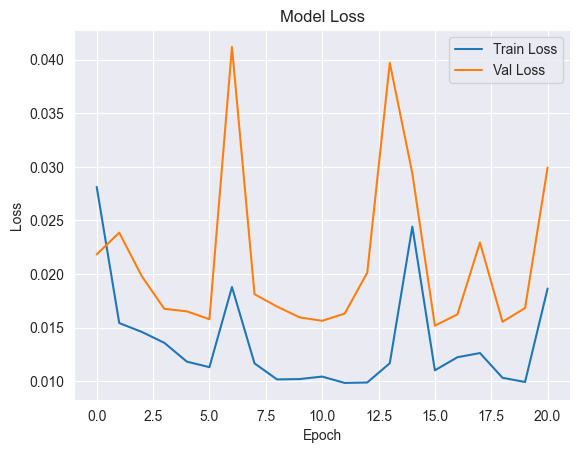

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt

# LSTM-Modell aufbauen
model = Sequential()
model.add(LSTM(160, input_shape=(lookback, X_train.shape[2]), return_sequences=False))
model.add(Dropout(0.2))  
model.add(Dense(16))
model.add(Dropout(0.2))
model.add(Dense(1))

# Optimizer und Kompilierung
optimizer = RMSprop()
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Modell-Training
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, verbose=1, callbacks=[early_stopping])

# Loss-Werte über die Epochen plotten
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
neuronen_anzahl = '160D16'  # D für Dense 
lookback = '500LB'          # LB für Lookback
epochen = '20Epochs'
inputs = '2Inp'          # E für die Version des Experiments
version = '20E'
model.save(f"LSTM_{lookback}_Dropout_{neuronen_anzahl}_{version}_{epochen}_{inputs}.h5")

/Users/vincentkatter/Programming/miniconda3/envs/data-analysis/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
from keras.models import load_model
lstm_model = load_model(f"LSTM_{lookback}_Dropout_{neuronen_anzahl}_{version}_{epochen}_{inputs}.h5")

In [13]:
from sklearn.metrics import mean_squared_error

# Vorhersagen für Testdaten generieren
y_pred_scaled = lstm_model.predict(X_test)
# make the rmse 
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_scaled))
print(f"RMSE: {rmse}")

2024-09-11 17:28:51.796810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-11 17:28:51.821645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


344/344 [==============================] - 5s 13ms/step


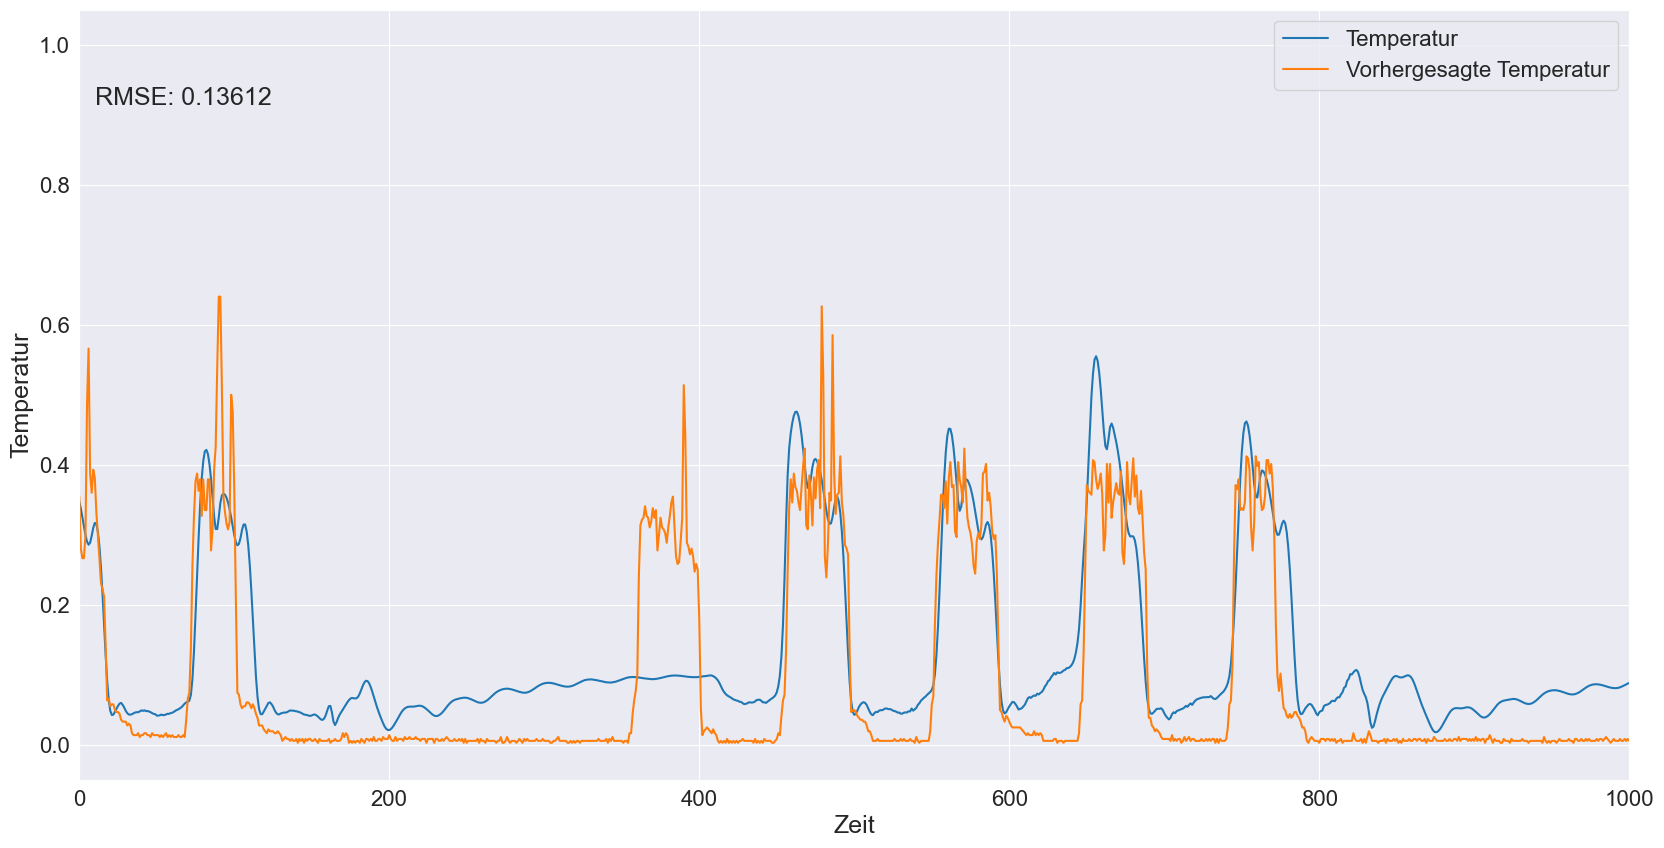

In [16]:
plt.figure(figsize=(20, 10))
plt.plot(y_pred_scaled, label='Temperatur')
plt.plot(y_test, label='Vorhergesagte Temperatur')

# Titel, Achsenbeschriftungen und Legenden mit vergrößerter Schriftgröße
#plt.title('LSTM (Eingangsschicht: Heizleistung und Lüfterleistung)', fontsize=20)
plt.xlabel('Zeit', fontsize=18)
plt.ylabel('Temperatur', fontsize=18)
plt.legend(fontsize=16)
# Achsentick-Labels mit vergrößerter Schriftgröße
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Text mit vergrößerter Schriftgröße
plt.text(0.01, 0.9, f'RMSE: 0.13612', transform=plt.gca().transAxes, fontsize=18, verticalalignment='top')

plt.xlim(0,1000)
#plt.savefig(f"LSTM_{lookback}_{neuronen_anzahl}_{version}_{epochen}_{inputs}.png", dpi=600)
plt.show()
